<a href="https://colab.research.google.com/github/himanshukhasdev/Global-Terrorism-Analysis/blob/main/Himanshu_Khasdev_Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

Things I am doing in this kernel is something like:

1. Understand the dataset : We'll look at each variable and analyze about their meaning and importance in this dataset.
2. Basic cleaning : We'll clean the dataset and handle the missing data.
3. Key findings includes :
*   Terrorist Attack Frequency with every year 
*   In which year the maximum attacks were taking place ?

*   Which city was the favorite target of terrorist?

*   Which type of weapon was used in maximum attacks?
*   Which terrorist organization was more active?


*   and so on!





Now, it's time to have fun!

In [1]:
#Importing import libraries
import pandas as pd                        #for data accessing and processing 
import numpy as np                         #for linear algebra 
import matplotlib.pyplot as plt            #for plotting graphs and charts
%matplotlib inline
import seaborn as sns                      #for plotting graphs and charts
import warnings                            #for ignoring irrelevant warning messages
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive             #for drive mounting
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#reading data using read_csv
df = pd.read_csv('/content/drive/MyDrive/Capstone Project-EDA/Global Terrorism Data.csv',encoding="ISO-8859-1")
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
#checking no. of columns
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [5]:
#checking shape 
df.shape

(181691, 135)

In [6]:
#checking size of dataset
df.size

24528285

#**Data Cleaning & Considering Columns Which Have Null Values Less Than 50%**

In [7]:
#Keeping only those columns which have <50% nulls
main_cols = []
for i in df.columns:
  if df[i].isna().sum()<0.50*len(df):
    main_cols.append (i)
main_cols

['eventid',
 'iyear',
 'imonth',
 'iday',
 'extended',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'gname',
 'guncertain1',
 'individual',
 'nperps',
 'nperpcap',
 'claimed',
 'weaptype1',
 'weaptype1_txt',
 'weapsubtype1',
 'weapsubtype1_txt',
 'weapdetail',
 'nkill',
 'nkillus',
 'nkillter',
 'nwound',
 'nwoundus',
 'nwoundte',
 'property',
 'ishostkid',
 'scite1',
 'dbsource',
 'INT_LOG',
 'INT_IDEO',
 'INT_MISC',
 'INT_ANY']

In [8]:
new_df=df[main_cols]

In [9]:
#checking shape of new data
new_df.shape

(181691, 58)

In [10]:
#checking if new data have null values or not
new_df.isnull().sum()

eventid                 0
iyear                   0
imonth                  0
iday                    0
extended                0
country                 0
country_txt             0
region                  0
region_txt              0
provstate             421
city                  434
latitude             4556
longitude            4557
specificity             6
vicinity                0
summary             66129
crit1                   0
crit2                   0
crit3                   0
doubtterr               1
multiple                1
success                 0
suicide                 0
attacktype1             0
attacktype1_txt         0
targtype1               0
targtype1_txt           0
targsubtype1        10373
targsubtype1_txt    10373
corp1               42550
target1               636
natlty1              1559
natlty1_txt          1559
gname                   0
guncertain1           380
individual              0
nperps              71115
nperpcap            69489
claimed     

In [11]:
new_df.isnull().sum()/len(new_df) *100

eventid              0.000000
iyear                0.000000
imonth               0.000000
iday                 0.000000
extended             0.000000
country              0.000000
country_txt          0.000000
region               0.000000
region_txt           0.000000
provstate            0.231712
city                 0.238867
latitude             2.507554
longitude            2.508104
specificity          0.003302
vicinity             0.000000
summary             36.396409
crit1                0.000000
crit2                0.000000
crit3                0.000000
doubtterr            0.000550
multiple             0.000550
success              0.000000
suicide              0.000000
attacktype1          0.000000
attacktype1_txt      0.000000
targtype1            0.000000
targtype1_txt        0.000000
targsubtype1         5.709144
targsubtype1_txt     5.709144
corp1               23.418882
target1              0.350045
natlty1              0.858050
natlty1_txt          0.858050
gname     

In [12]:
#dropping duplicates from the remaining data
duplicates = new_df.drop_duplicates()
if len(duplicates)==len(new_df):
  print("No Duplicates")
else:
  print ("Duplicates Removed")

No Duplicates


In [13]:
new_df.dtypes

eventid               int64
iyear                 int64
imonth                int64
iday                  int64
extended              int64
country               int64
country_txt          object
region                int64
region_txt           object
provstate            object
city                 object
latitude            float64
longitude           float64
specificity         float64
vicinity              int64
summary              object
crit1                 int64
crit2                 int64
crit3                 int64
doubtterr           float64
multiple            float64
success               int64
suicide               int64
attacktype1           int64
attacktype1_txt      object
targtype1             int64
targtype1_txt        object
targsubtype1        float64
targsubtype1_txt     object
corp1                object
target1              object
natlty1             float64
natlty1_txt          object
gname                object
guncertain1         float64
individual          

#**Taking Relevent Columns For Analysis Only**

In [14]:
#This dataset consist of 135 columns and most of the columns are having maximum null values,so we removed the null values and keep only neccessary columns from the dataset.

relevant_columns=['eventid','iyear','imonth','iday','country_txt','provstate','city','region_txt','attacktype1_txt','target1','success','nkill','nwound','summary','gname','targtype1_txt','weaptype1_txt']

In [15]:
data = new_df[relevant_columns]

In [16]:
#the columns heading not make any sense,so we will rename it for better understanding.
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State','city':'City','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','success':'Success','nkill':'Killed','nwound':'Wounded','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type'},inplace=True)

**Columns Detail:**

1. 'Year' ➡ (Numeric Variable)This field contains the year in which the incident occurred.
2. 'Month' ➡ (Numeric Variable)This field contains the number of the month in which the incident occurred.
3. 'Day' ➡ (Numeric Variable)This field contains the numeric day of the month on which the incident occurred.
4. 'Country' ➡ (Categorical Variable)This field identifies the country or location where the incident occurred.
5. 'State' ➡ (Text Variable)This variable records the name (at the time of event) of the 1st order subnational administrative region in which the event occurs.
6. 'City' ➡ (Text Variable)This field contains the name of the city, village, or town in which the incident occurred.
7. 'Region' ➡ (Categorical Variable)This field identifies the region in which the incident occurred.
8. 'AttackType' ➡ (Categorical Variable)This field captures the general method of attack and often reflects the broad class of tactics used.
9. 'Target' ➡ (Text Variable)This is the specific person, building, installation, etc., that was targeted and/or victimized
10. 'Success' ➡ (Categorical Variable)Success of a terrorist strike is defined according to the tangible effects of the attack.1 = "Yes" The incident was successful.0 = "No" The incident was not successful.
11. 'Killed' ➡ (Numeric Variable)This field stores the number of total confirmed fatalities for the incident.
12. 'Wounded' ➡ (Numeric Variable)This field records the number of confirmed non-fatal injuries to both perpetrators and victims. 
13. 'Group' ➡ (Text Variable)This field contains the name of the group that carried out the attack.
14. 'Target_type' ➡ (Categorical Variable)The target/victim type field captures the general type of target/victim.
15. 'Weapon_type' ➡ (Categorical Variable)Up to four weapon types are recorded for each incident.

In [17]:
#Column "eventid" have no significant data for analysis
data.drop('eventid',axis=1,inplace=True)

In [18]:
data.shape

(181691, 16)

In [19]:
#chekcing the basic parameters like max, min,mean etc
#applicable only on columns containing numerical values
data.describe()

,Year,Month,Day,Success,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,181691.000000,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,0.889598,2.403272,3.167668
std,13.259430,3.388303,8.814045,0.313391,11.545741,35.949392
min,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,1.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,1.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,1.000000,2.000000,2.000000
max,2017.000000,12.000000,31.000000,1.000000,1570.000000,8191.000000


#Checking Null Values using "isna()"

In [20]:
#checking null values in remaining dataset
data.isna().sum()

Year               0
Month              0
Day                0
Country            0
State            421
City             434
Region             0
AttackType         0
Target           636
Success            0
Killed         10313
Wounded        16311
summary        66129
Group              0
Target_type        0
Weapon_type        0
dtype: int64

In [21]:
#checking data types of individual columns
data.dtypes

Year             int64
Month            int64
Day              int64
Country         object
State           object
City            object
Region          object
AttackType      object
Target          object
Success          int64
Killed         float64
Wounded        float64
summary         object
Group           object
Target_type     object
Weapon_type     object
dtype: object

In [22]:
#replacing null values with median in numerical columns
for i in ['Killed','Wounded']:
  data[i]=data[i].fillna(data[i].median())

In [23]:
#replacing null values with mode in categorical columns
for i in ['State','City','Target']:
  data[i]=data[i].fillna(data[i].mode()[0])

In [24]:
#checking null values again
data.isna().sum()

Year               0
Month              0
Day                0
Country            0
State              0
City               0
Region             0
AttackType         0
Target             0
Success            0
Killed             0
Wounded            0
summary        66129
Group              0
Target_type        0
Weapon_type        0
dtype: int64

In [25]:
#finding correlation of each column in the dataframe
#only applicable on columns containing numerical variables
data.corr()

,Year,Month,Day,Success,Killed,Wounded
Year,1.000000,0.000139,0.018254,-0.082963,0.021252,0.017484
Month,0.000139,1.000000,0.005497,-0.002845,0.004031,0.003178
Day,0.018254,0.005497,1.000000,-0.011802,-0.003225,-0.001082
Success,-0.082963,-0.002845,-0.011802,1.000000,0.049619,0.023346
Killed,0.021252,0.004031,-0.003225,0.049619,1.000000,0.443326
Wounded,0.017484,0.003178,-0.001082,0.023346,0.443326,1.000000


Correlation coefficients are always values between -1 and 1, where -1 shows a perfect, linear negative correlation, and 1 shows a perfect, linear positive correlation.

##Top 10 Years with highest number of attacks!

In [26]:
data['Year'].value_counts().head(10)

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
Name: Year, dtype: int64

#Data Visualization using Matplotlib and Seaborn libraries

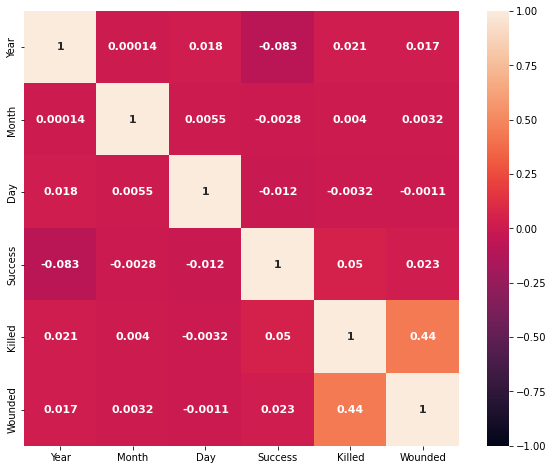

In [27]:
#Using heatmap for showing the correlation between columns
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),vmax=1,vmin=-1,annot=True,annot_kws={'fontsize':11, 'fontweight':'bold'},square=True)

##Frequency Of Terrorist Attack Every Year

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text major ticklabel objects>)

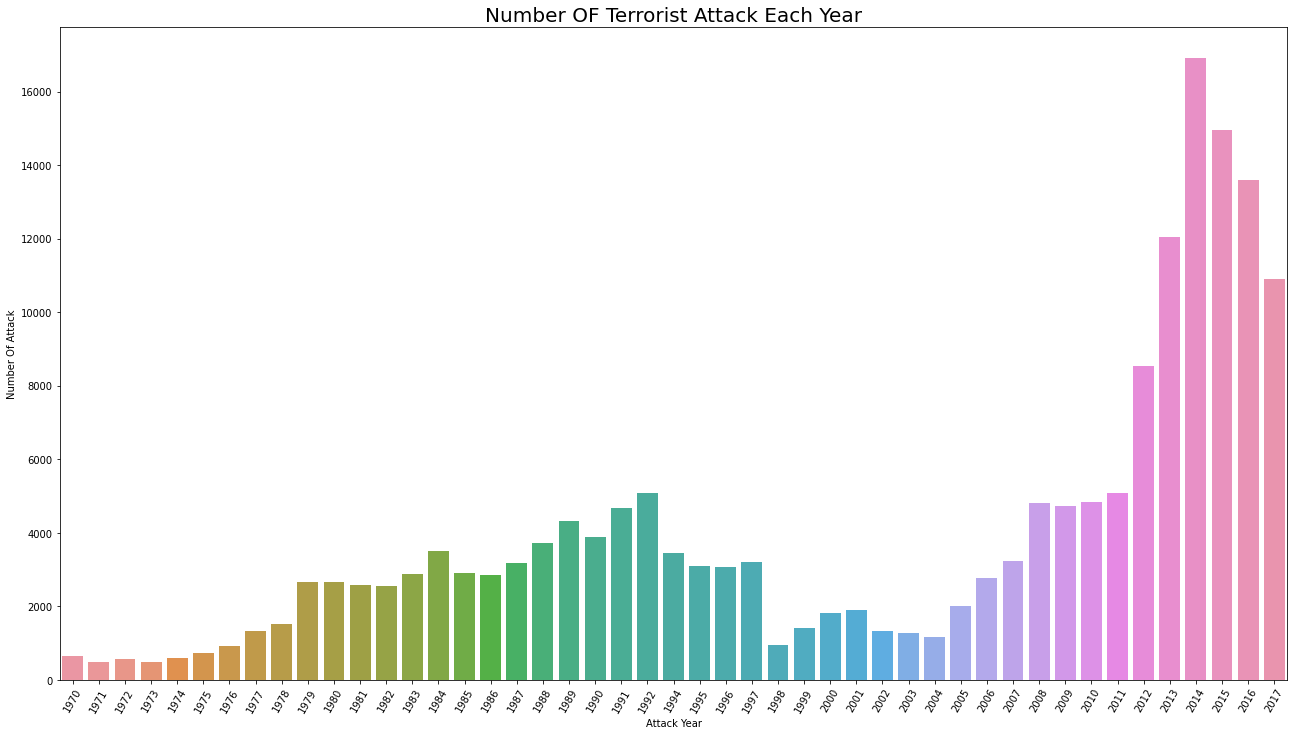

In [28]:
plt.figure(figsize=(22,12))
sns.countplot(data['Year'])
plt.xlabel('Attack Year')
plt.ylabel('Number Of Attack')
plt.title('Number OF Terrorist Attack Each Year', fontsize=20)
plt.xticks(rotation = 60)

*   2014 is the year in which highest no. of terrorist attacks take place.

##Favourite Country of terrorists.

Text(0.5, 1.0, 'Number Of Terrorist Activities in Top 10 Countries')

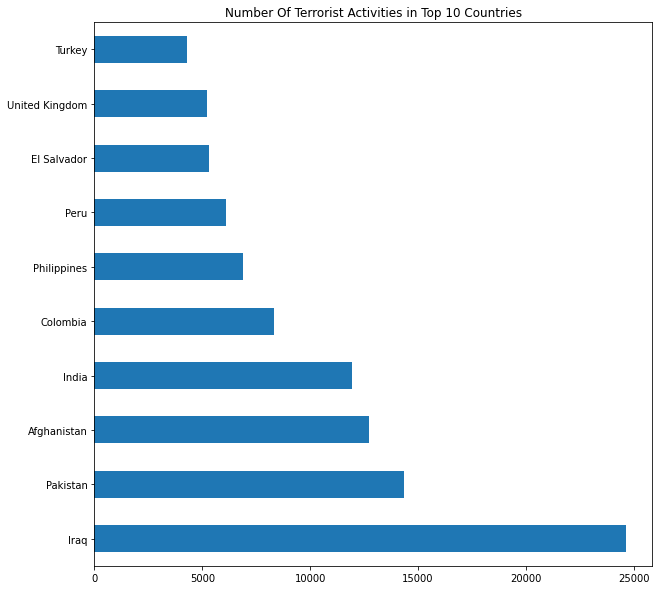

In [29]:
data['Country'].value_counts().head(10).plot(kind='barh',figsize=[10,10])
plt.title('Number Of Terrorist Activities in Top 10 Countries')

*   Iraq is the country with highest terrorist attacks.

##Favourite City of terrorists.

Text(0.5, 1.0, 'Number Of Terrorist Activities in Top 10 Cities')

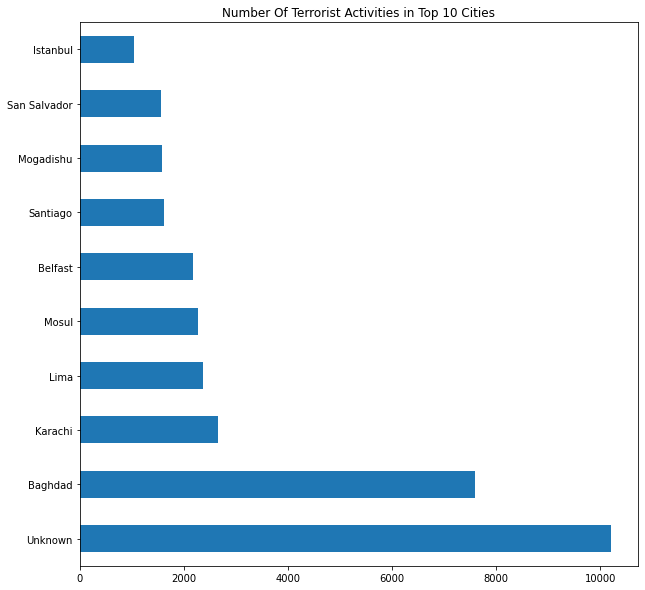

In [30]:
data['City'].value_counts().head(10).plot(kind='barh',figsize=[10,10])
plt.title('Number Of Terrorist Activities in Top 10 Cities')

*   Since Unknown is used for the city which cannot be determined from the available information. So Unknown will be neglected.
*   Baghdad was the favourite city of terrorist.




##Favourite Region of terrorists.

Text(0.5, 1.0, 'Number Of Terrorist Activities in Top 10 Regions')

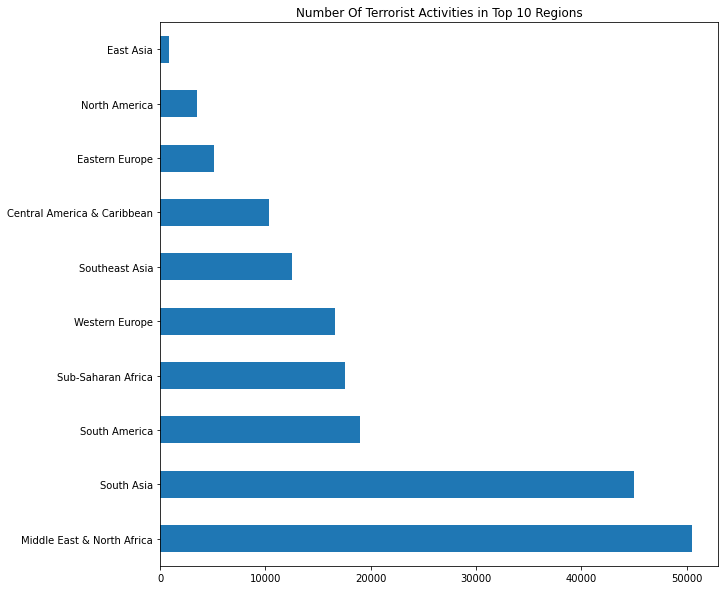

In [31]:
data['Region'].value_counts().head(10).plot(kind='barh',figsize=[10,10])
plt.title('Number Of Terrorist Activities in Top 10 Regions')

*   Middle East & North Africa is the region with highest terrorist attacks.

##Terrorist Groups with Highest Terror Attacks.

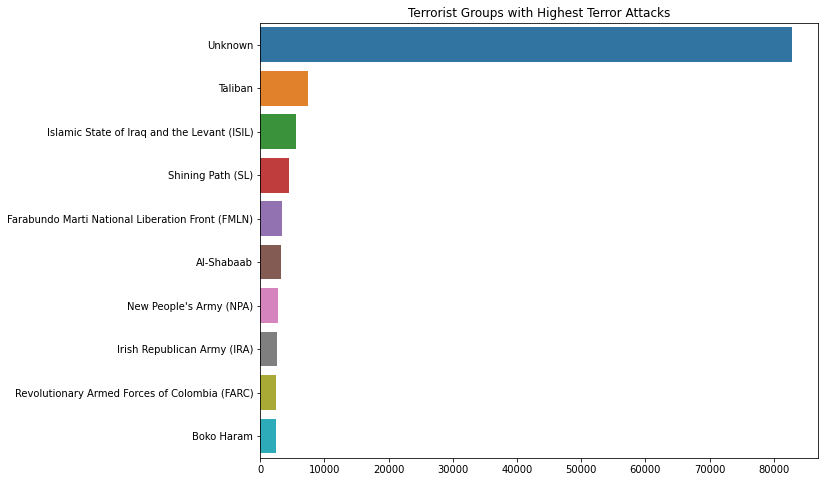

In [32]:
sns.barplot(data['Group'].value_counts()[:10].values,data['Group'].value_counts()[:10].index)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

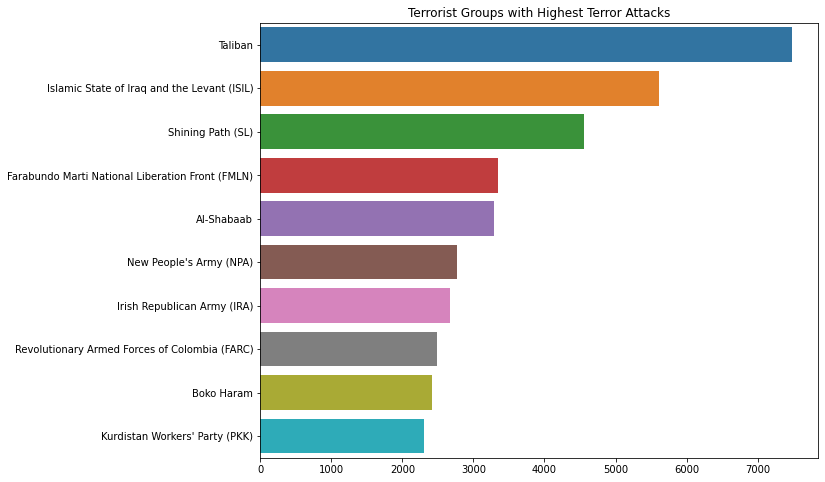

In [33]:
sns.barplot(data['Group'].value_counts()[1:11].values,data['Group'].value_counts()[1:11].index)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

*   Since Unknown is used for unidentified or small group which is not popular, so we are going to neglect it.
*   Taliban group is with the highest terror attacks.



##Number of people killed during attacks per year.


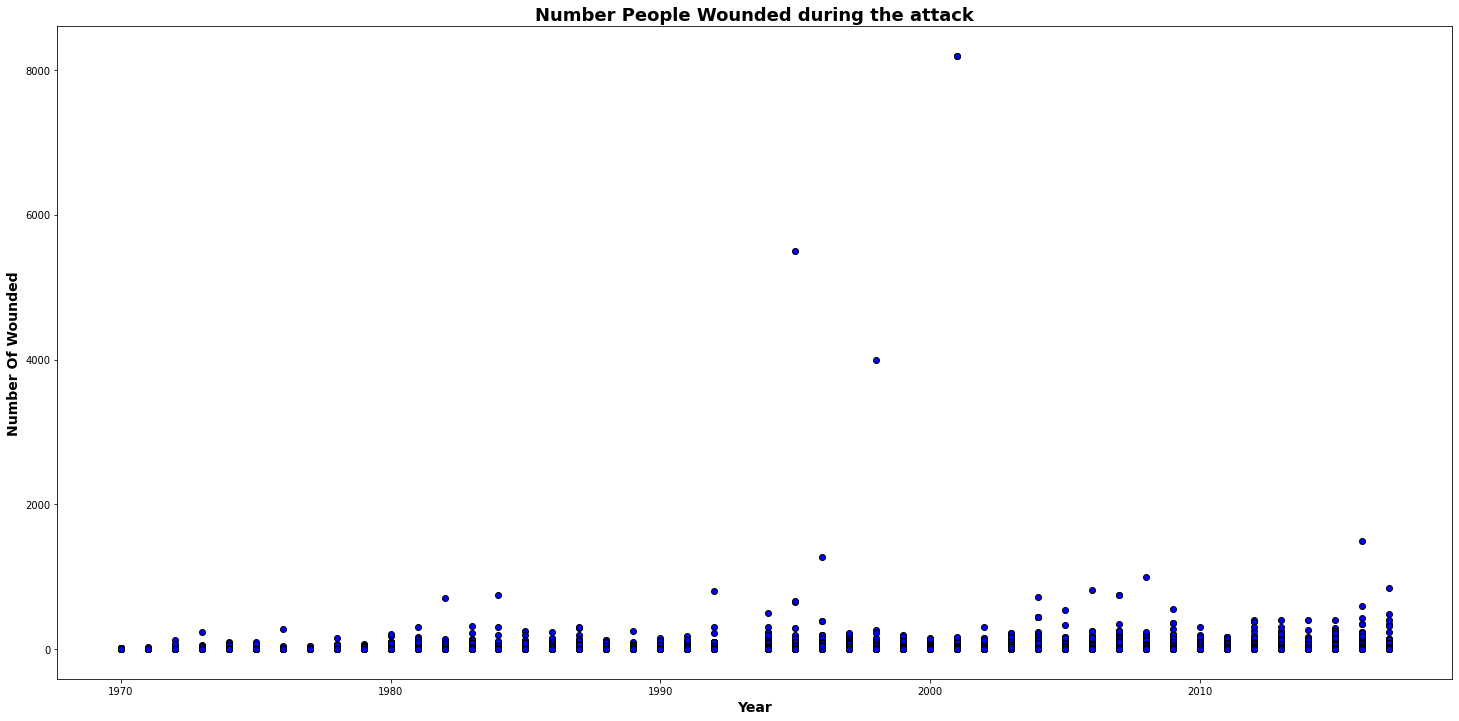

In [34]:
plt.figure(figsize=(25,12))
plt.scatter(data['Year'], data['Wounded'], color='b',edgecolor='k')
plt.xlabel('Year',fontweight='bold',fontsize=14)
plt.ylabel('Number Of Wounded',fontweight='bold',fontsize=14)
plt.title('Number People Wounded during the attack',fontweight='bold',fontsize=18)
plt.show()

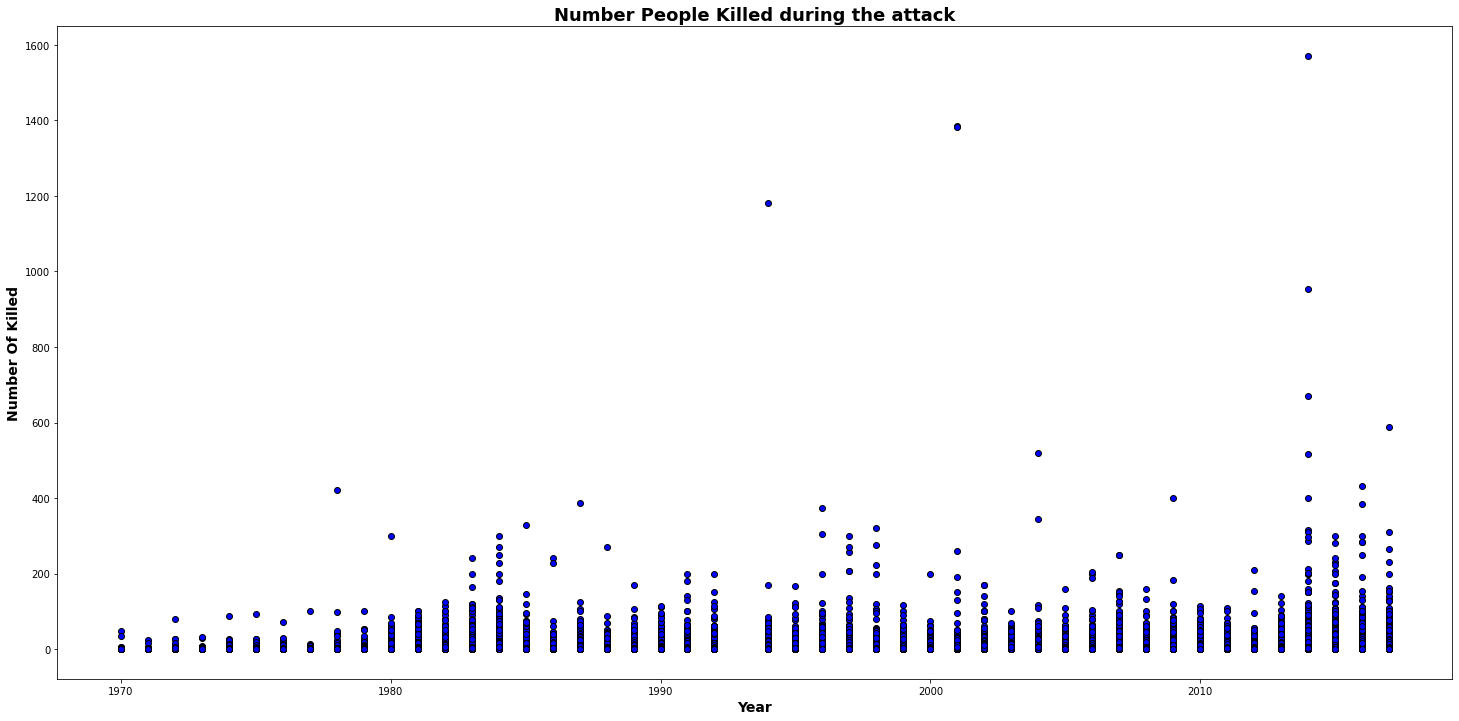

In [35]:
plt.figure(figsize=(25,12))
plt.scatter(data['Year'], data['Killed'], color='b',edgecolor='k')
plt.xlabel('Year',fontweight='bold',fontsize=14)
plt.ylabel('Number Of Killed',fontweight='bold',fontsize=14)
plt.title('Number People Killed during the attack',fontweight='bold',fontsize=18)
plt.show()



*   Maximum people where died in 2014.



##Trend of top 5 terroist oragnizations

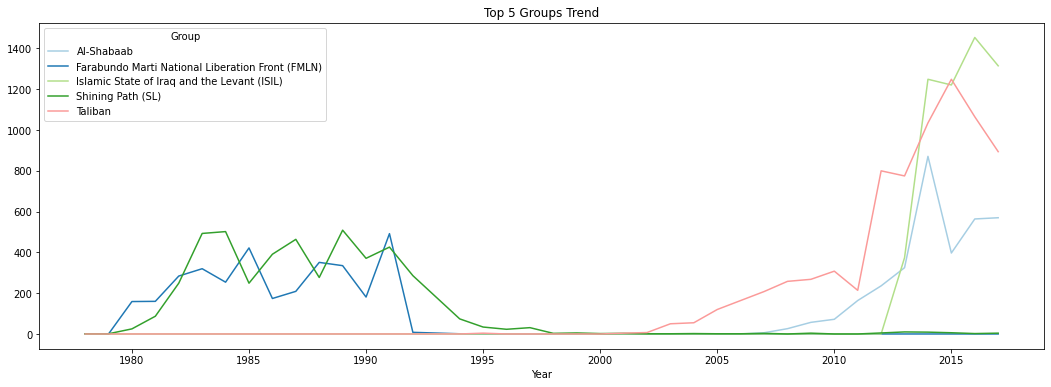

In [36]:
top_groups5=data[data['Group'].isin(data['Group'].value_counts()[1:6].index)]
pd.crosstab(top_groups5.Year,top_groups5.Group).plot(kind='line',color=sns.color_palette('Paired',15))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title("Top 5 Groups Trend")
plt.show()



*   Islamic State of Iraq and the Levant (ISIL) & Taliban are the 2 terrorist groups which are more active after 2010.
*   Number of attacks of Islamic State of Iraq and the Levant (ISIL) group is high in 2016 while number of attacks of Taliban group is high in 2015.



##Favourite Weapons used during teror attacks.


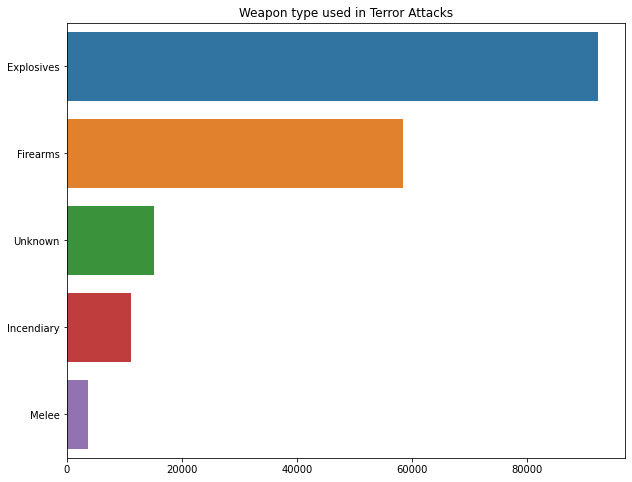

In [37]:
sns.barplot(data['Weapon_type'].value_counts()[:5].values,data['Weapon_type'].value_counts()[:5].index)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Weapon type used in Terror Attacks')
plt.show()



*   Explosives are the favourite weapons used by many terrorist organizations.



##Favourite Target Type

Text(0.5, 1.0, 'Favorite Target Type')

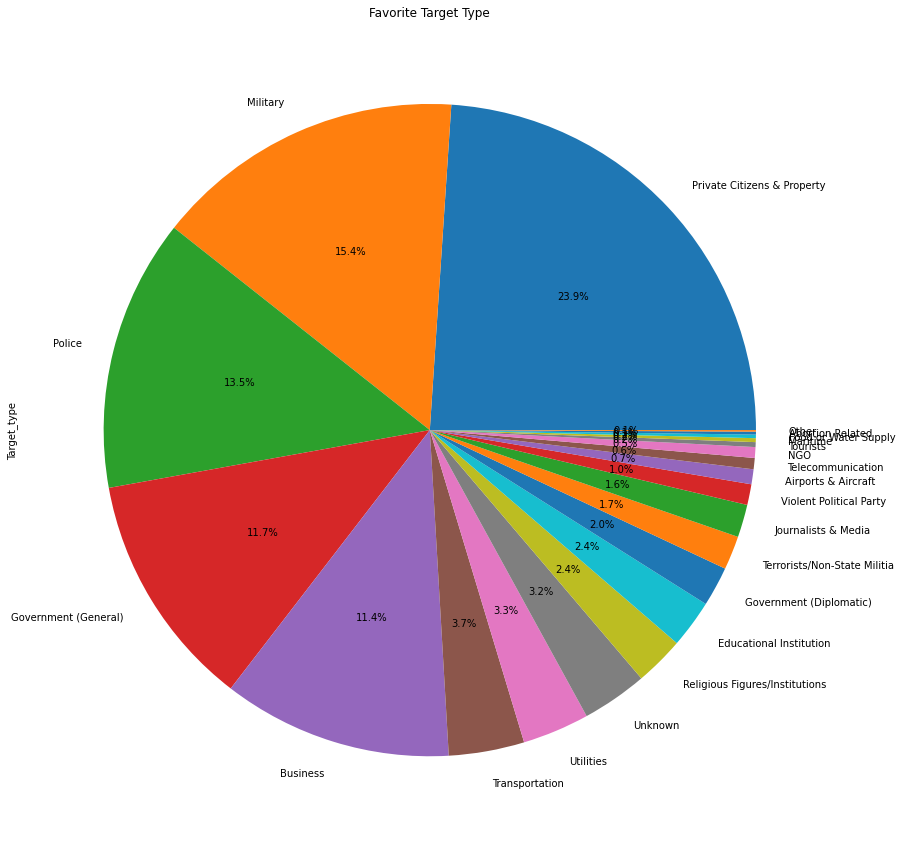

In [38]:
data['Target_type'].value_counts().plot(kind='pie',figsize=[20,15],autopct='%1.1f%%')
plt.title('Favorite Target Type')

*   Main Target of Terrorist is Private Citizens & Property and Military.



##Favourite Target

Text(0.5, 1.0, 'Top 10 Targets')

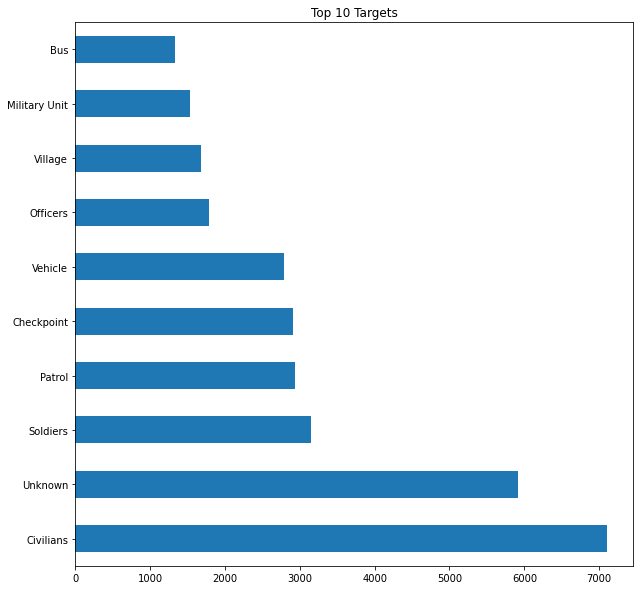

In [39]:
data['Target'].value_counts().head(10).plot(kind='barh',figsize=[10,10])
plt.title('Top 10 Targets')



*   Civilians are the favourite targets.

##Success/Fail in attacks

Text(0.5, 1.0, 'Success/Fail')

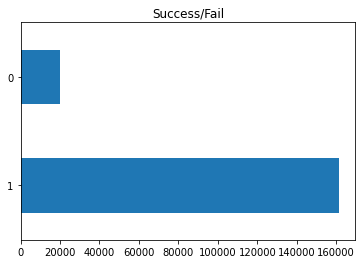

In [40]:
data['Success'].value_counts().plot(kind='barh')
plt.title('Success/Fail')



*   Percentage of Success-88.89%
*   Percentage of Failure-11.11%

